In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [2]:
q1=pd.read_csv("50_Startups.csv")
q1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
q1['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [4]:
q1.shape

(50, 5)

##### EDA

In [5]:
# To check if data types are correct
q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# checking for duplicated values
q1.duplicated().sum()

0

In [7]:
# Unnecessary column of state is to be dropped
q1.drop(columns='State',inplace = True)

In [8]:
# Renaming Columns
q1.rename(columns=({'R&D Spend':'RD','Administration':'ADM','Marketing Spend':'M_Spend'}),inplace=True)

In [9]:
# checking for null values
q1.isna().sum()

RD         0
ADM        0
M_Spend    0
Profit     0
dtype: int64

<Axes: >

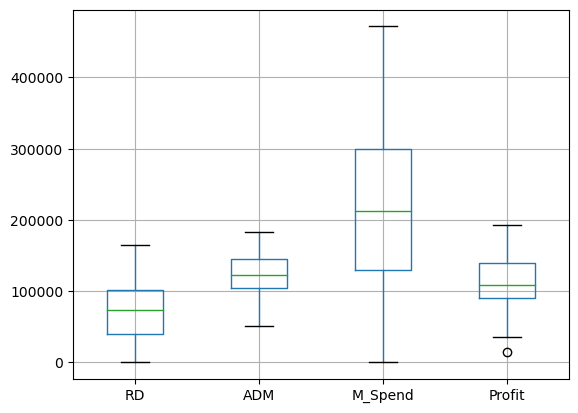

In [10]:
q1.boxplot()

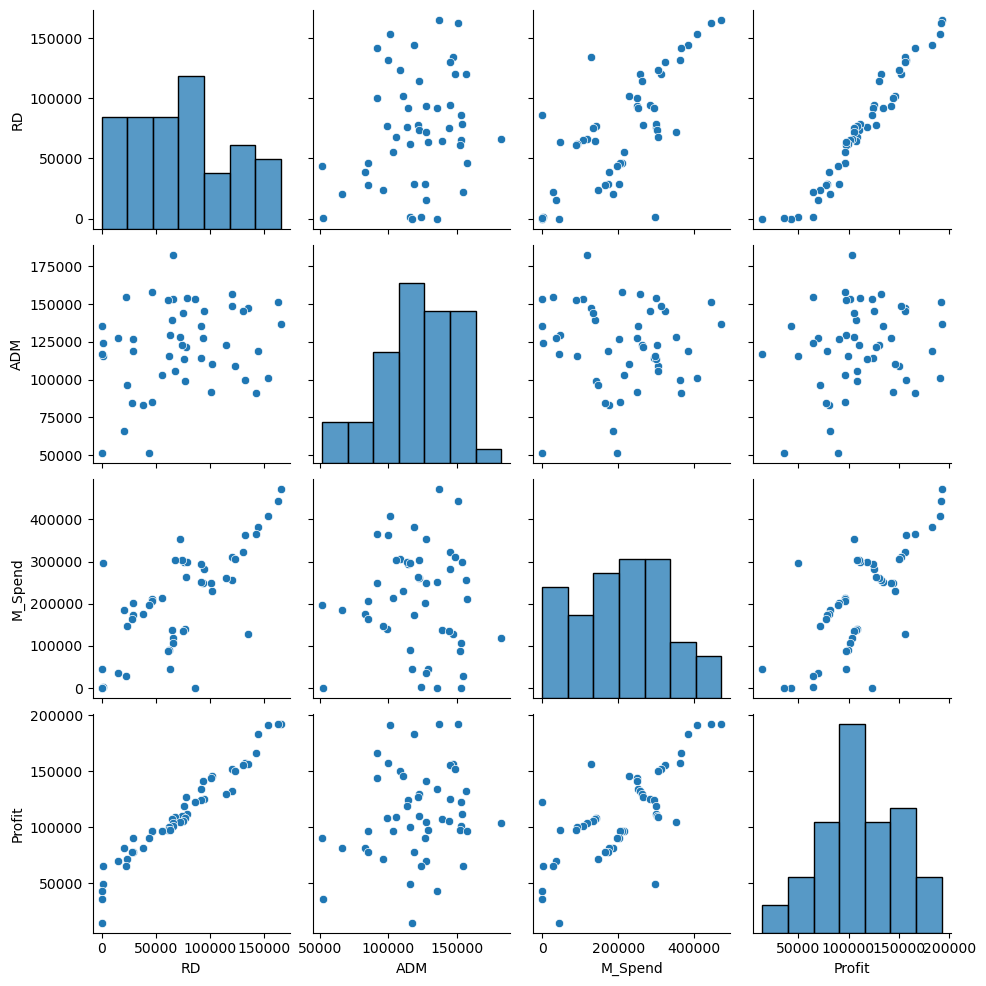

In [11]:
sns.pairplot(q1)
plt.show()

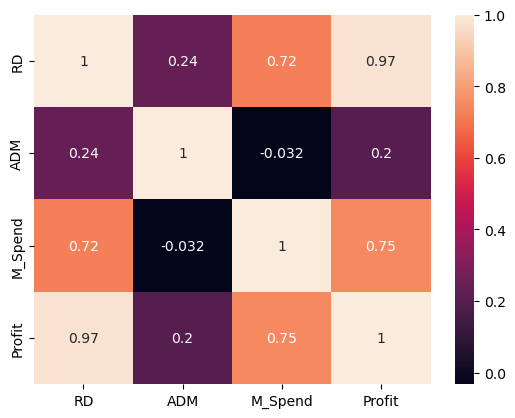

In [12]:
sns.heatmap(q1.corr(),annot = True)
plt.show()

In [13]:
# Pierson's coeff. value between M_spend and RD shows that they are strongly related, so there is a
# multicollinearity problem

##### Model Building

In [14]:
import statsmodels.formula.api as smf

In [15]:
model=smf.ols('Profit~RD+ADM+M_Spend',data=q1).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        04:12:42   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Creating separate models for ADM and M_spend
adm=smf.ols('Profit~ADM',data=q1).fit()
adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 20 Jul 2023   Prob (F-statistic):              0.162
Time:                        04:12:42   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
m_spend=smf.ols('Profit~M_Spend',data=q1).fit()
m_spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        04:12:42   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
M_Spend        0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Subset Selection
adm=smf.ols('Profit~ADM+RD',data=q1).fit()
adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           7.29e-31
Time:                        04:12:42   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
ADM           -0.0530      0.049     -1.073      0.289      -0.152       0.046
RD             0.8621      0.030     28.589      0.000       0.801       0.923
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
m_spend=smf.ols('Profit~M_Spend+RD',data=q1).fit()
m_spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           2.16e-31
Time:                        04:12:42   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
M_Spend        0.0299      0.016      1.927      0.060      -0.001       0.061
RD             0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# we cant see much differnce so we cant drop any column

##### Cooke's Distance

In [22]:
model=smf.ols('Profit~RD+ADM+M_Spend',data=q1).fit()

In [23]:
inf=model.get_influence()
c,p=inf.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

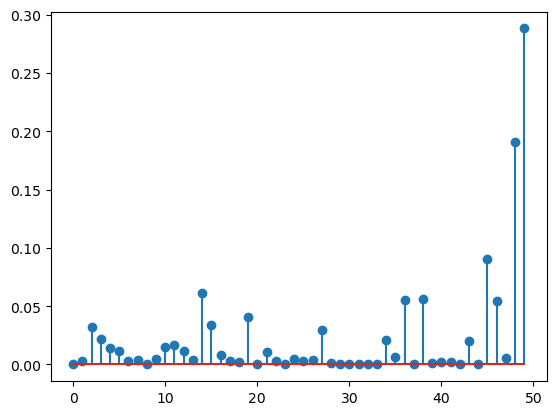

In [24]:
# Cooke's distance plot
plt.stem(range(len(q1)),c)
plt.show()

In [25]:
# no value above 1 in the graph so we wont delete any record
# Calculating the cut-off
k=len(q1.columns)
n=len(q1)
cut_off=3*(k+1)/n
cut_off

0.3

In [26]:
# Influence plot
from statsmodels.graphics.regressionplots import influence_plot

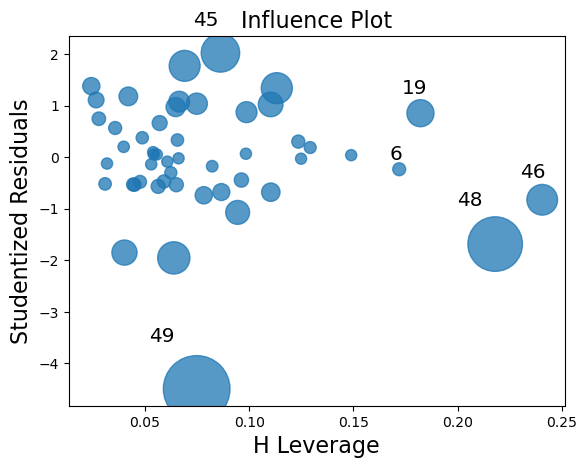

In [27]:
influence_plot(model);
plt.show()

##### Creating the final model

In [28]:
final_model=smf.ols('Profit~RD+ADM+M_Spend',data=q1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        04:12:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Prediction on new data

In [29]:
test_q1=pd.DataFrame({
    'RD':[196500],
    'ADM':[148000],
    'M_Spend':[445900]
})

In [30]:
final_model.predict(test_q1)

0    216617.431071
dtype: float64

#### Prepare a prediction model for predicting Price.

In [31]:
q2=pd.read_csv("ToyotaCorolla.csv",encoding='latin1',index_col='Id')
q2.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


In [32]:
# dropping unnecessary columns
q2=q2[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
q2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


##### EDA

In [33]:
# Checking data types
q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 112.2 KB


In [34]:
# duplicated values
q2.duplicated().sum()

1

In [35]:
q2.drop_duplicates(inplace=True)

In [36]:
# Checking for null values
q2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

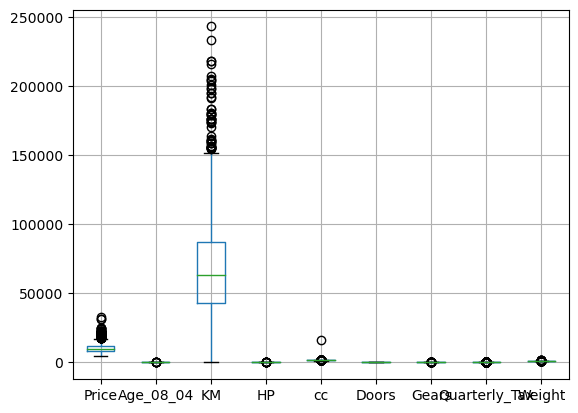

In [37]:
# Checking for outliers
q2.boxplot()
plt.show()

In [38]:
(q2['KM']>150000).sum()

52

In [39]:
# we will deal with them in further stages
# renaming columns
q2.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'Tax'},inplace=True)

##### Model Visualization

In [40]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

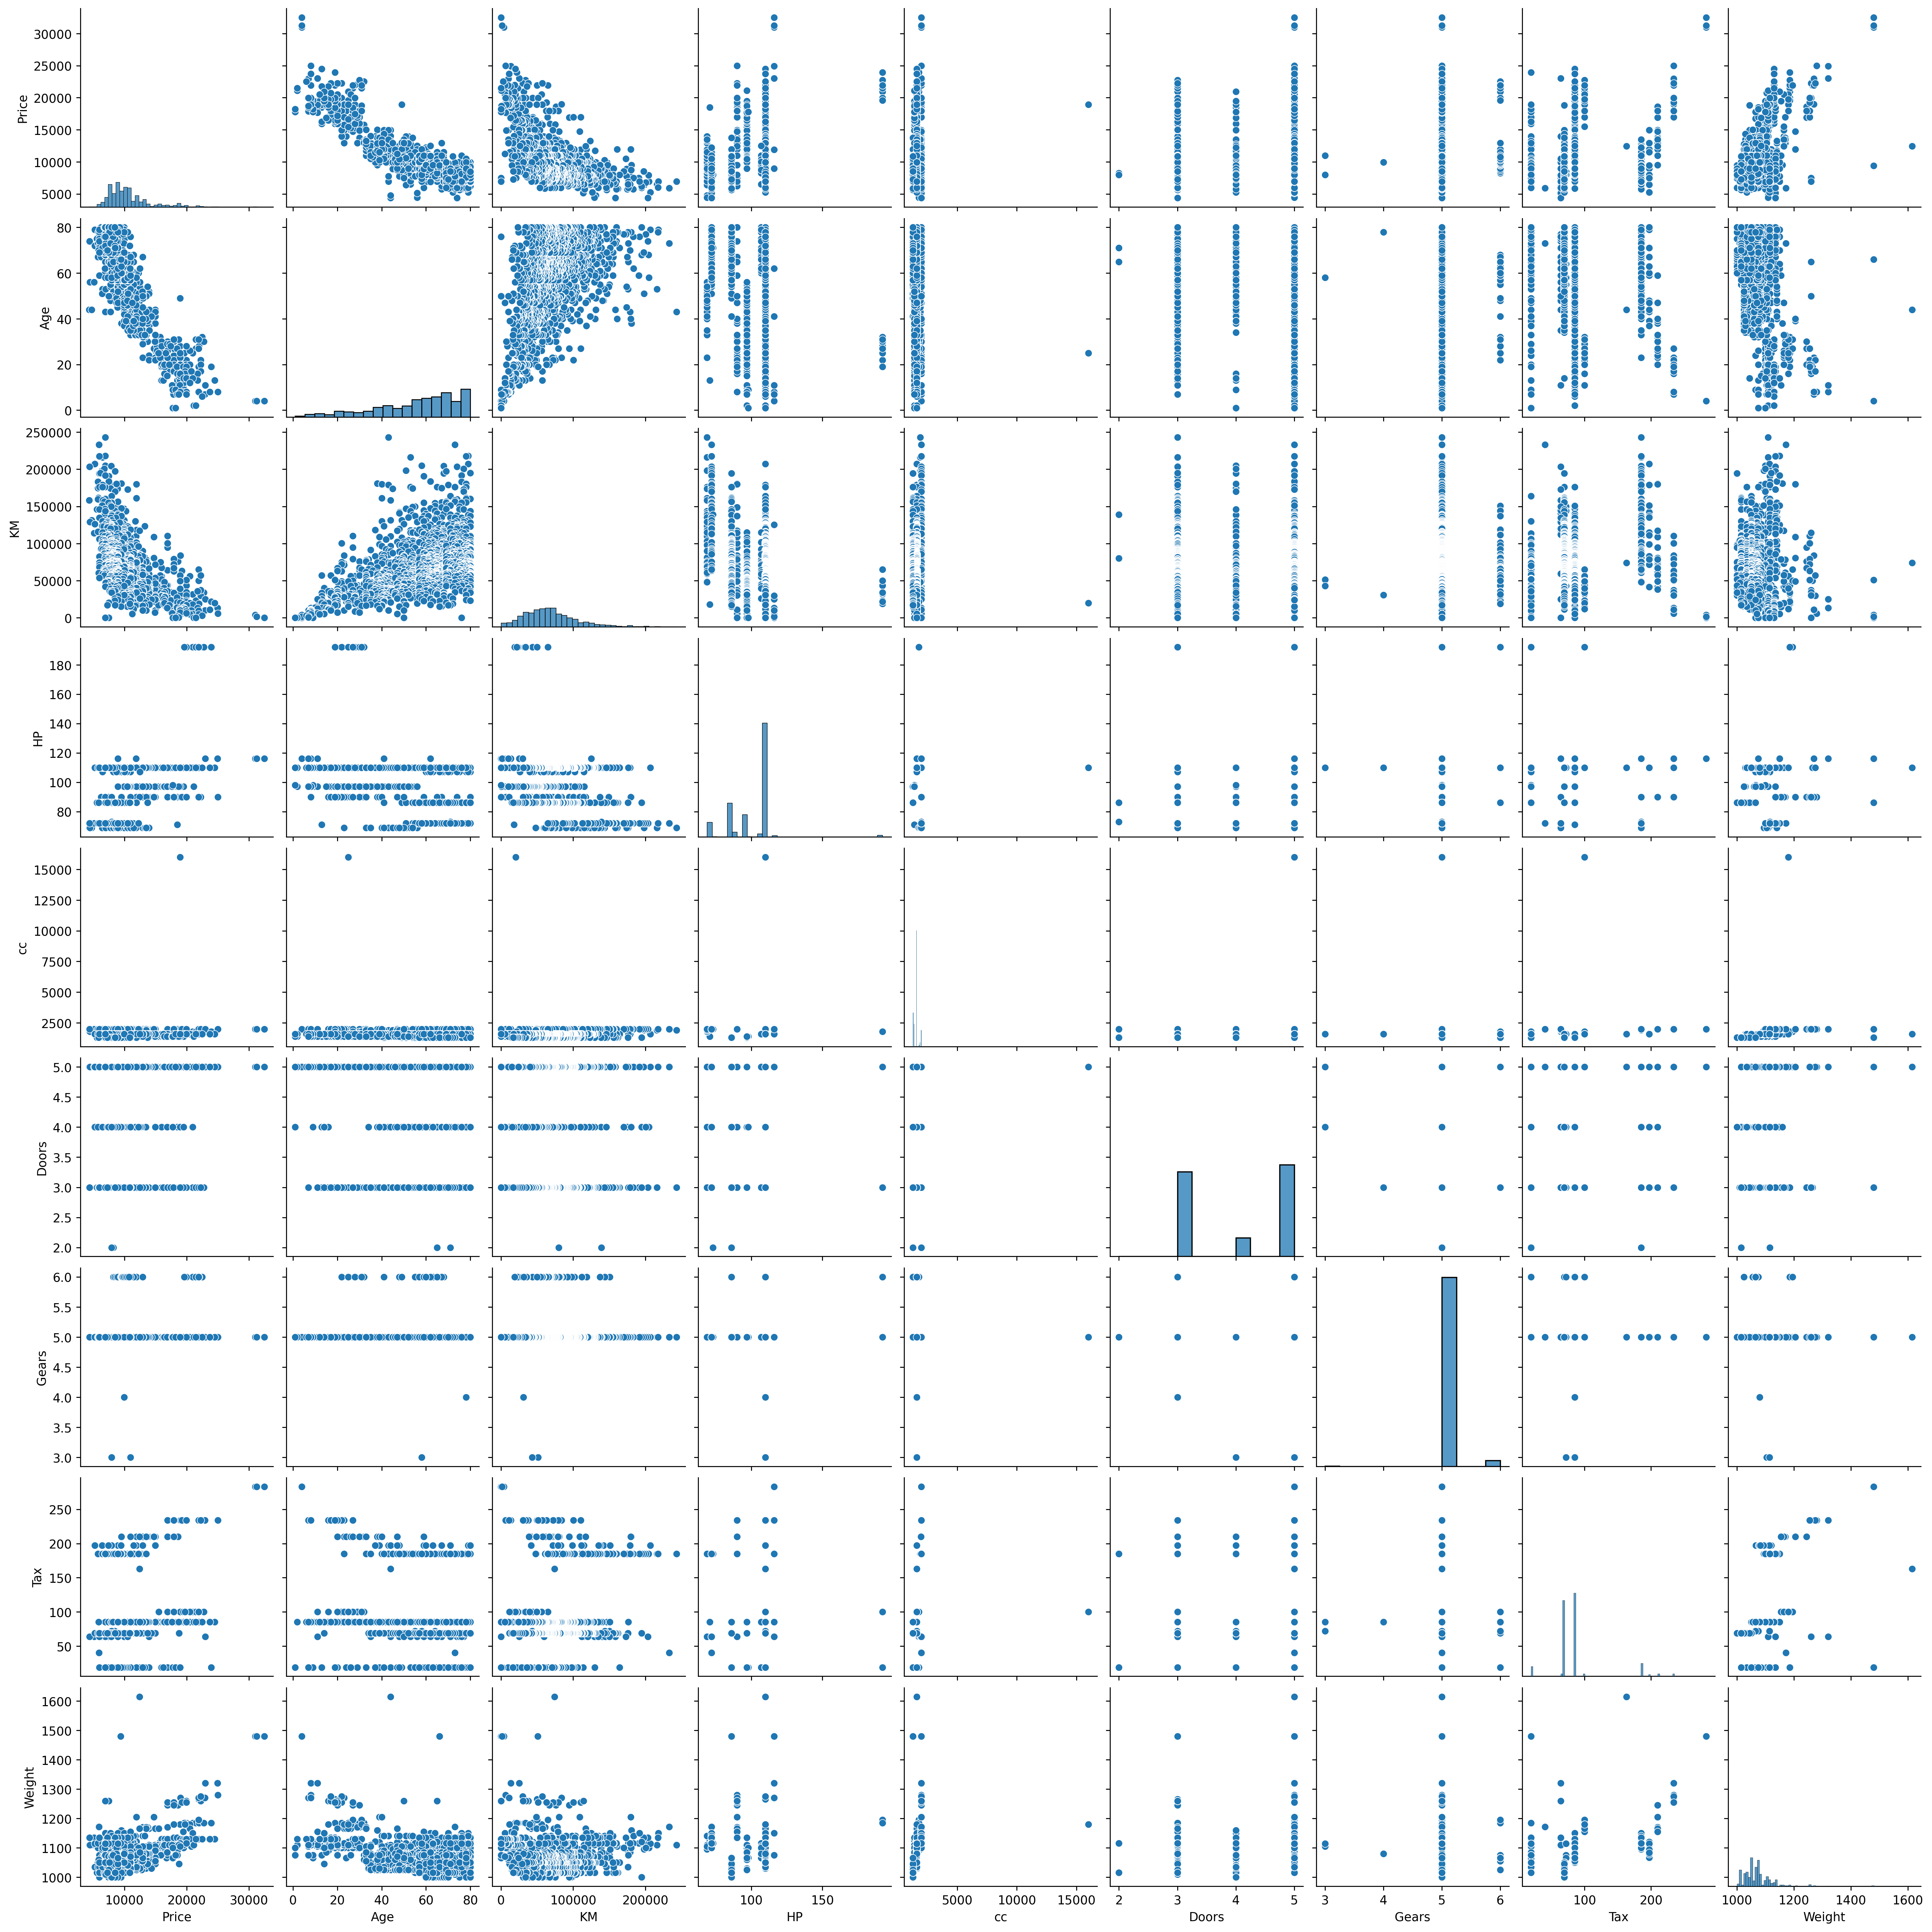

In [41]:
sns.pairplot(q2)
plt.show()

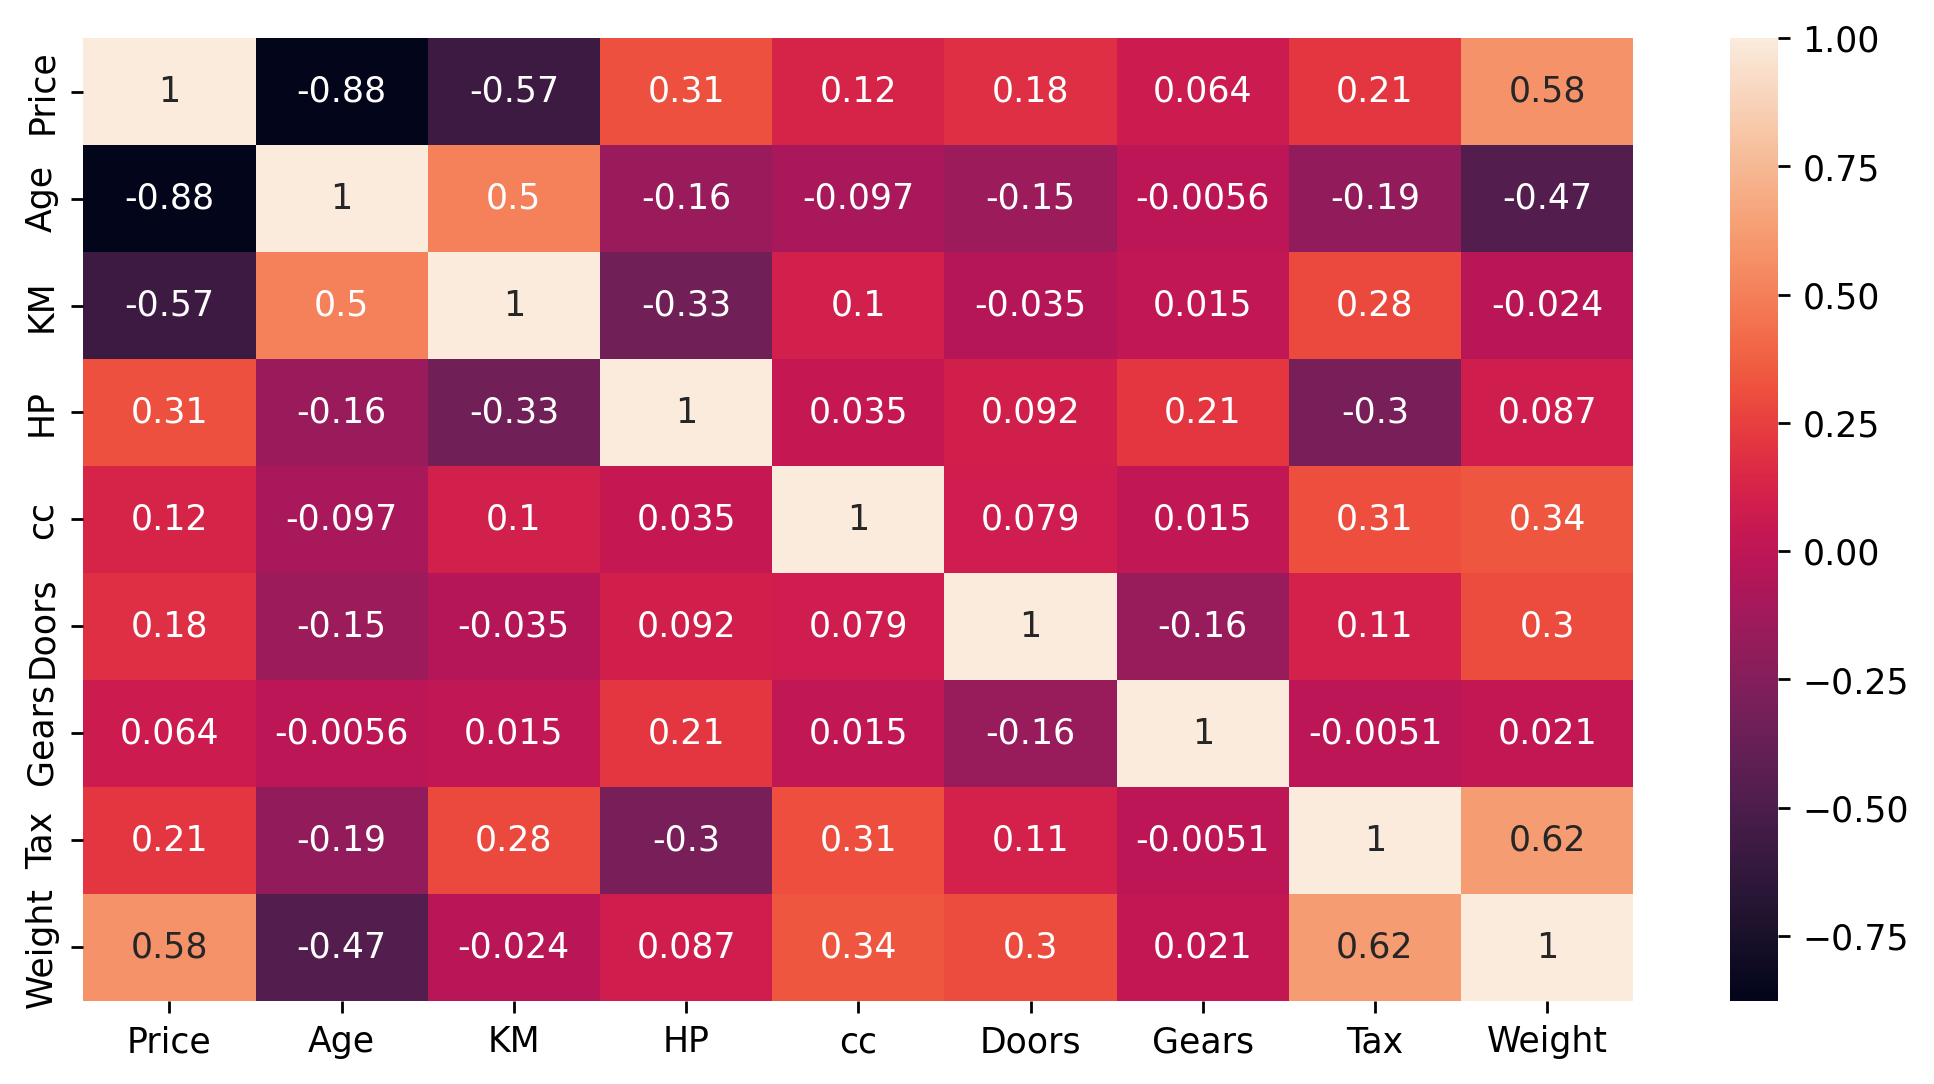

In [42]:
sns.heatmap(q2.corr(),annot = True)
plt.show()

##### Model Building

In [43]:
import statsmodels.formula.api as smf

In [44]:
model1=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=q2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        04:13:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend        0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# door column showing the high value which means it is not contributing to the target column
q2.drop(columns=['Doors'],inplace=True)
q2.head()

,Price,Age,KM,HP,cc,Gears,Tax,Weight
Id,,,,,,,,
1,13500,23,46986,90,2000,5,210,1165
2,13750,23,72937,90,2000,5,210,1165
3,13950,24,41711,90,2000,5,210,1165
4,14950,26,48000,90,2000,5,210,1165
5,13750,30,38500,90,2000,5,210,1170


In [46]:
model1=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=q2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1279.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:13:35   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5473.6812   1410.804     -3.880      0.000   -8241.154   -2706.209
Age         -121.7137      2.614    -46.568      0.000    -126.841    -116.587
KM            -0.0207      0.001    -16.566      0.000      -0.023      -0.018
HP            31.5800      2.810     11.240      0.000      26.069      37.091
cc            -0.1185      0.090     -1.317      0.188      -0.295       0.058
Gears        598.5773    193.312      3.096      0.002     219.371     977.784
Tax            3.8611      1.307      2.955      0.003       1.298       6.424
Weight        16.8493      1.035     16.283      0.000      14.819      18.879
==============================================================================
Omnibus:                      149.544   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              999.121
Skew:                          -0.204   Prob(JB):                    1.11e-217
Kurtosis:                       7.067   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Model Validation Technique

In [47]:
import statsmodels.api as sm

In [48]:
model1.resid

Id
1      -3290.768237
2      -2502.587946
3      -2828.449193
4      -1454.598438
5      -2449.004103
           ...     
1438   -1293.638680
1439    2552.975318
1440      45.116767
1441   -1328.670777
1442   -3446.566610
Length: 1435, dtype: float64

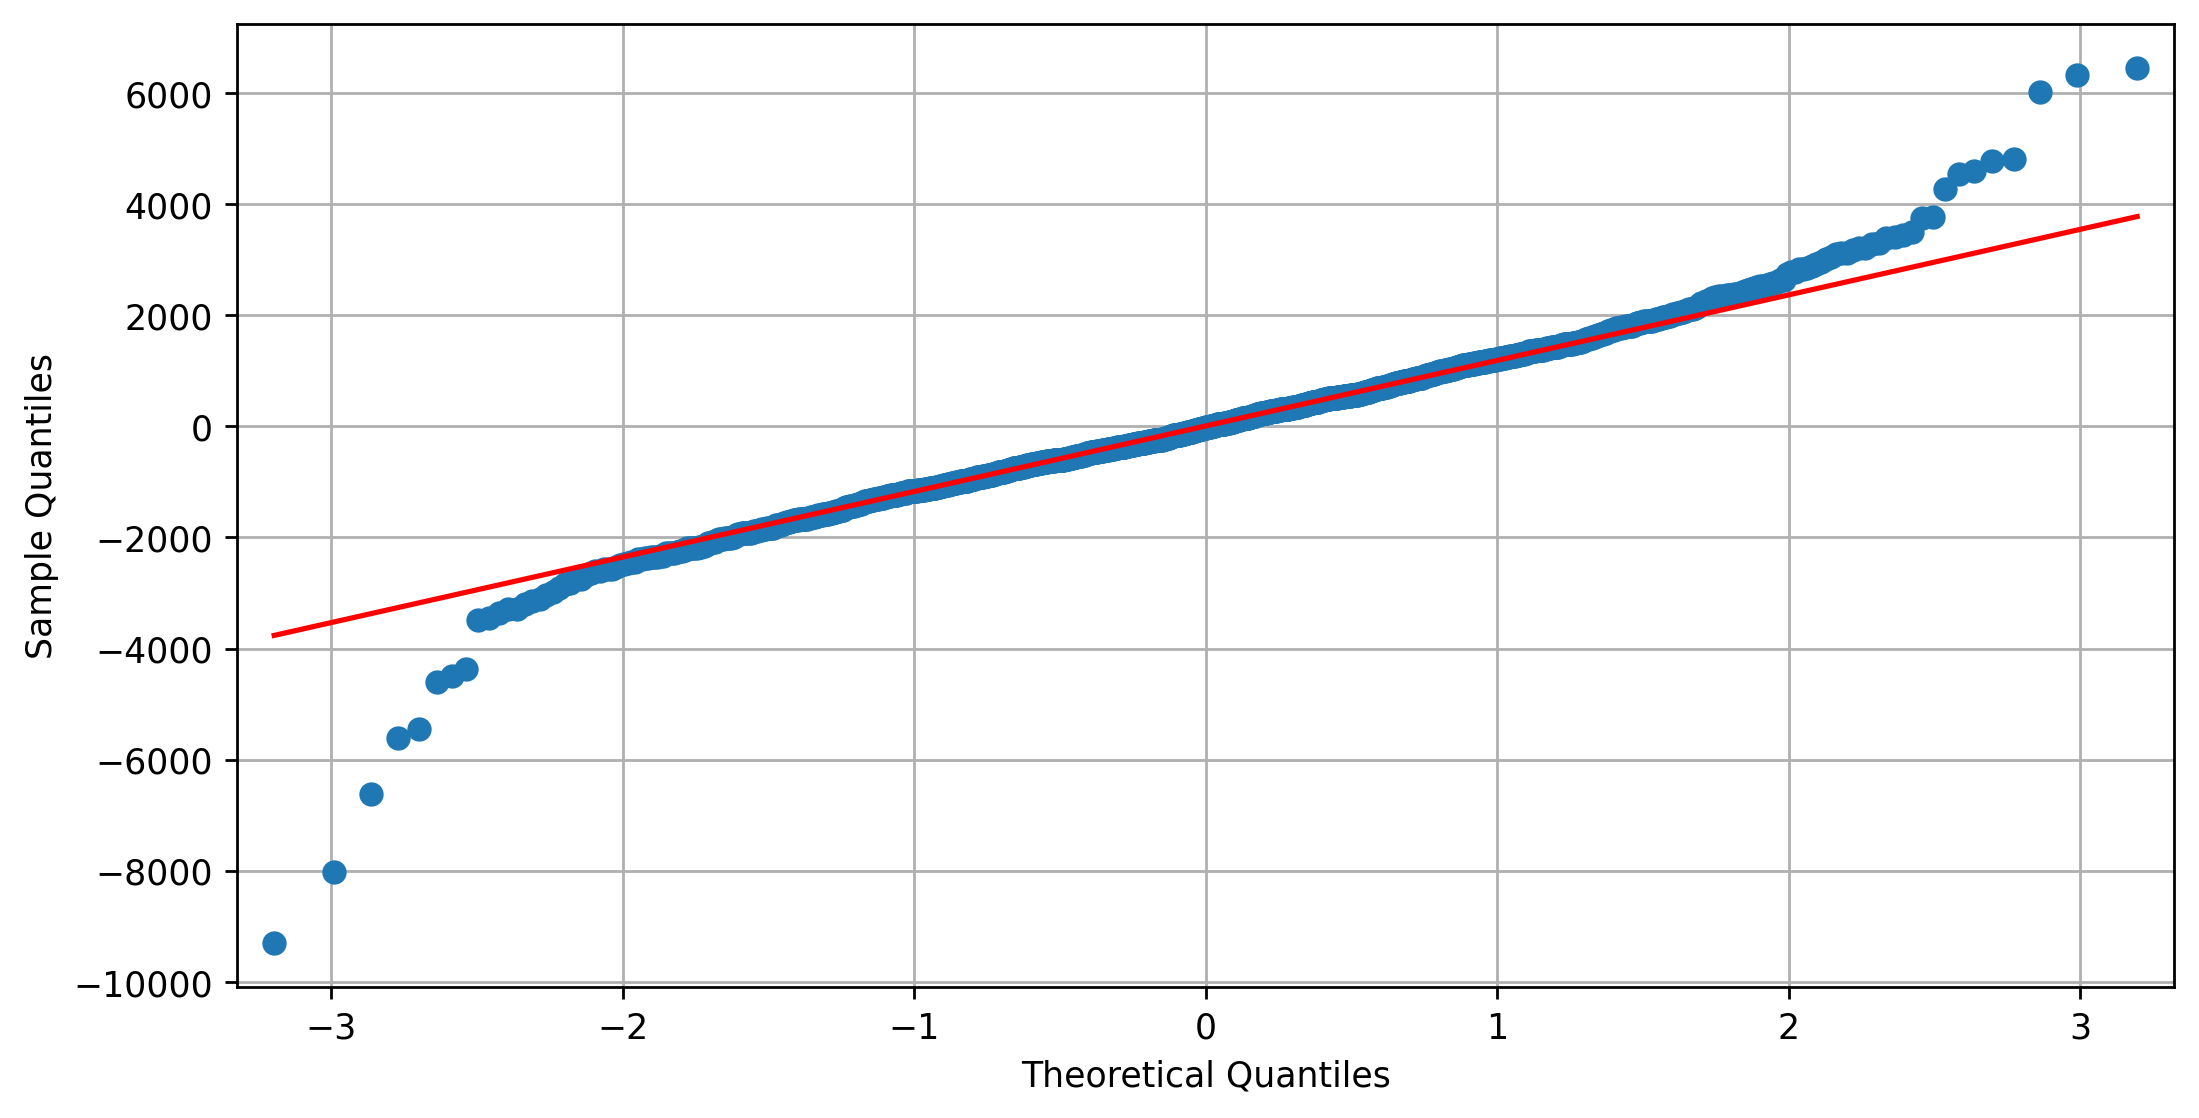

In [49]:
# Q-Q plot
sm.qqplot(model1.resid,line='q');
plt.grid()
plt.show()

In [50]:
np.where(model1.resid>4500)

(array([ 109,  110,  111,  146,  170,  522, 1057], dtype=int64),)

##### Residual Plot of Homoscedasticity

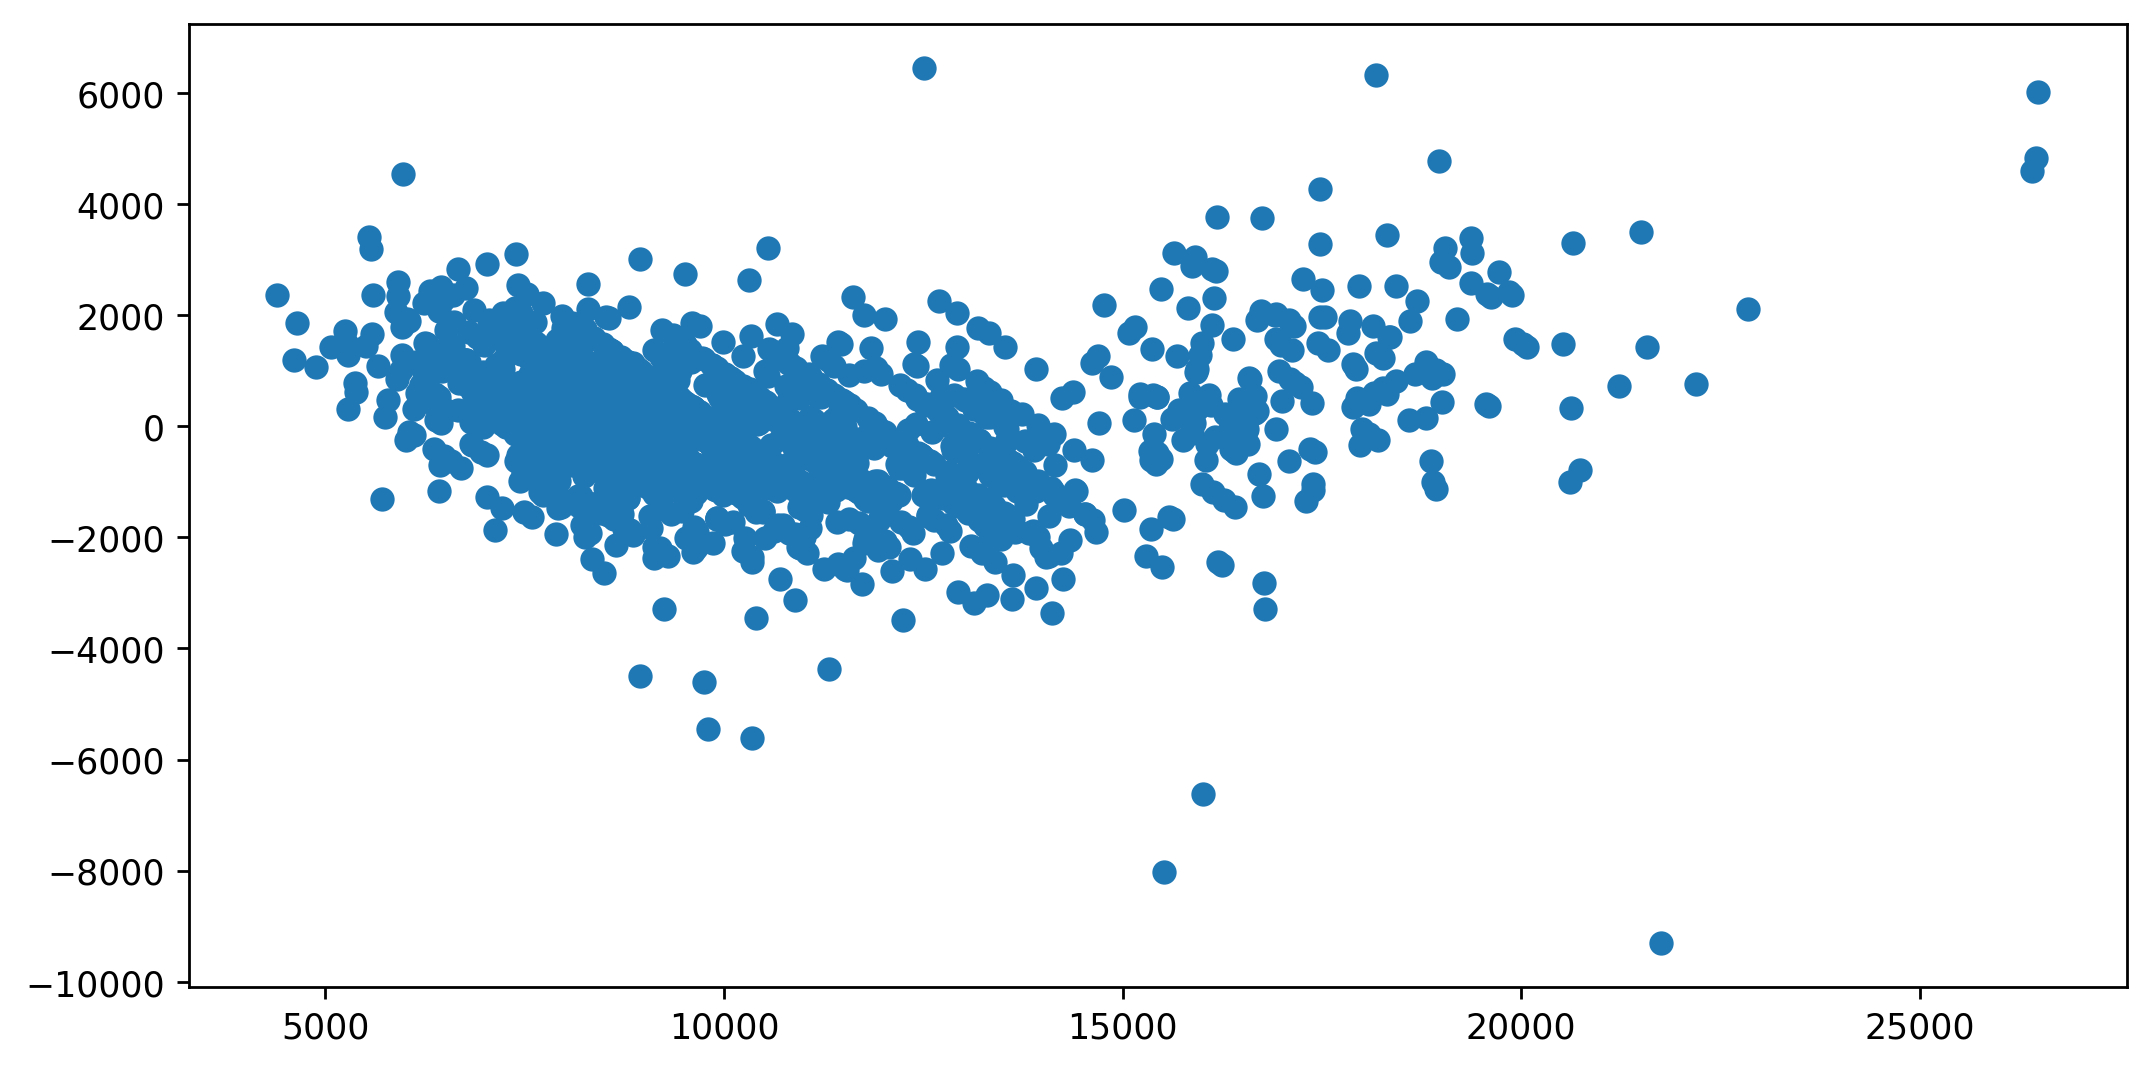

In [51]:
plt.scatter(model1.fittedvalues,model1.resid)
plt.show()

##### Model Deletion technique

In [52]:
model1=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=q2).fit()
inf=model1.get_influence()
c,p=inf.cooks_distance
c

array([6.96111678e-03, 3.74125127e-03, 5.26792390e-03, ...,
       8.81571446e-07, 7.47160381e-04, 1.19974600e-02])

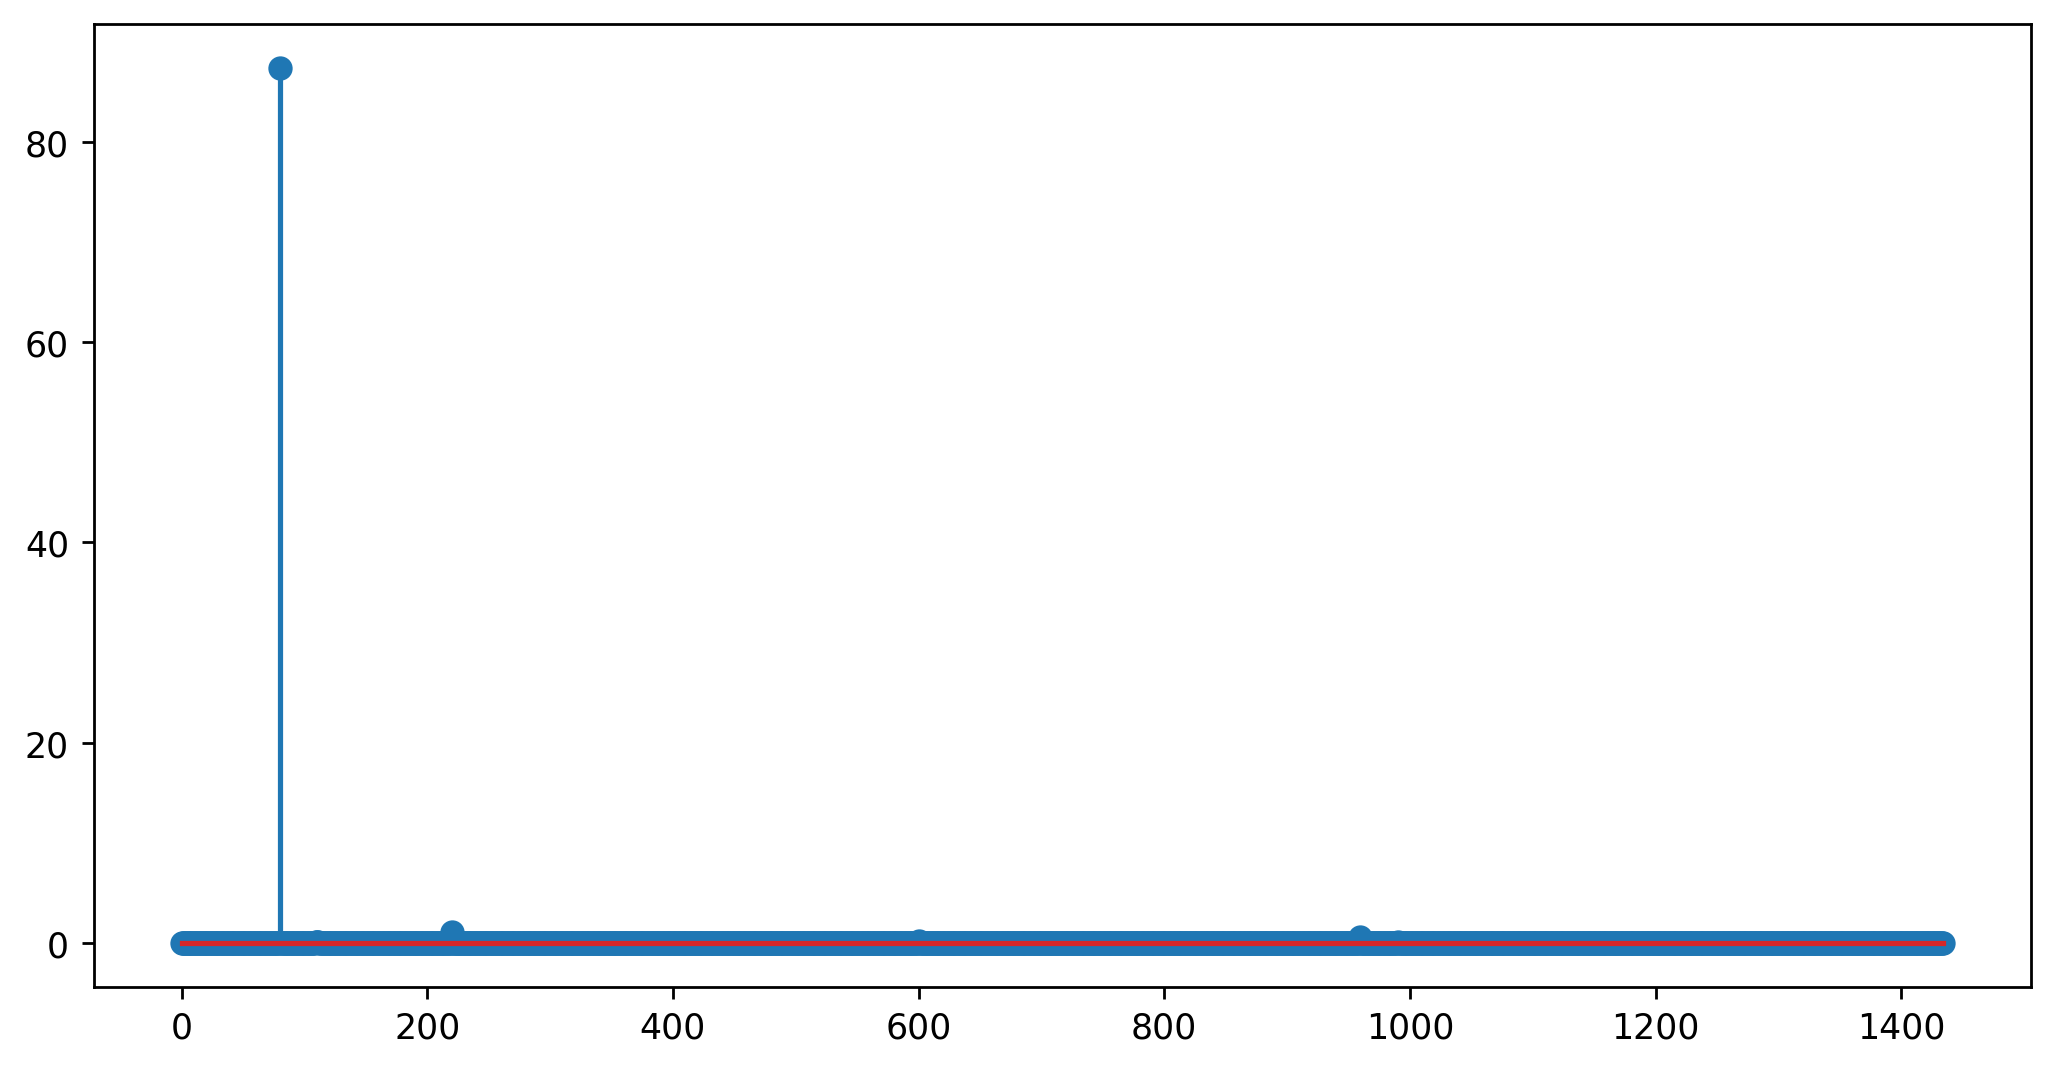

In [53]:
# Cooke's Distance plot
plt.stem(range(len(q2)),c)
plt.show()

In [54]:
np.argmax(c),np.max(c)

(80, 87.40014550948943)

In [55]:
q2.iloc[[80]]

,Price,Age,KM,HP,cc,Gears,Tax,Weight
Id,,,,,,,,
81,18950,25,20019,110,16000,5,100,1180


##### Improving the Model

In [56]:
# removing high influence point
q2.drop(index=[80],inplace=True)

In [57]:
#reseting the index
q2.reset_index(inplace=True)

In [58]:
q2.drop(columns=['Id'],inplace=True)

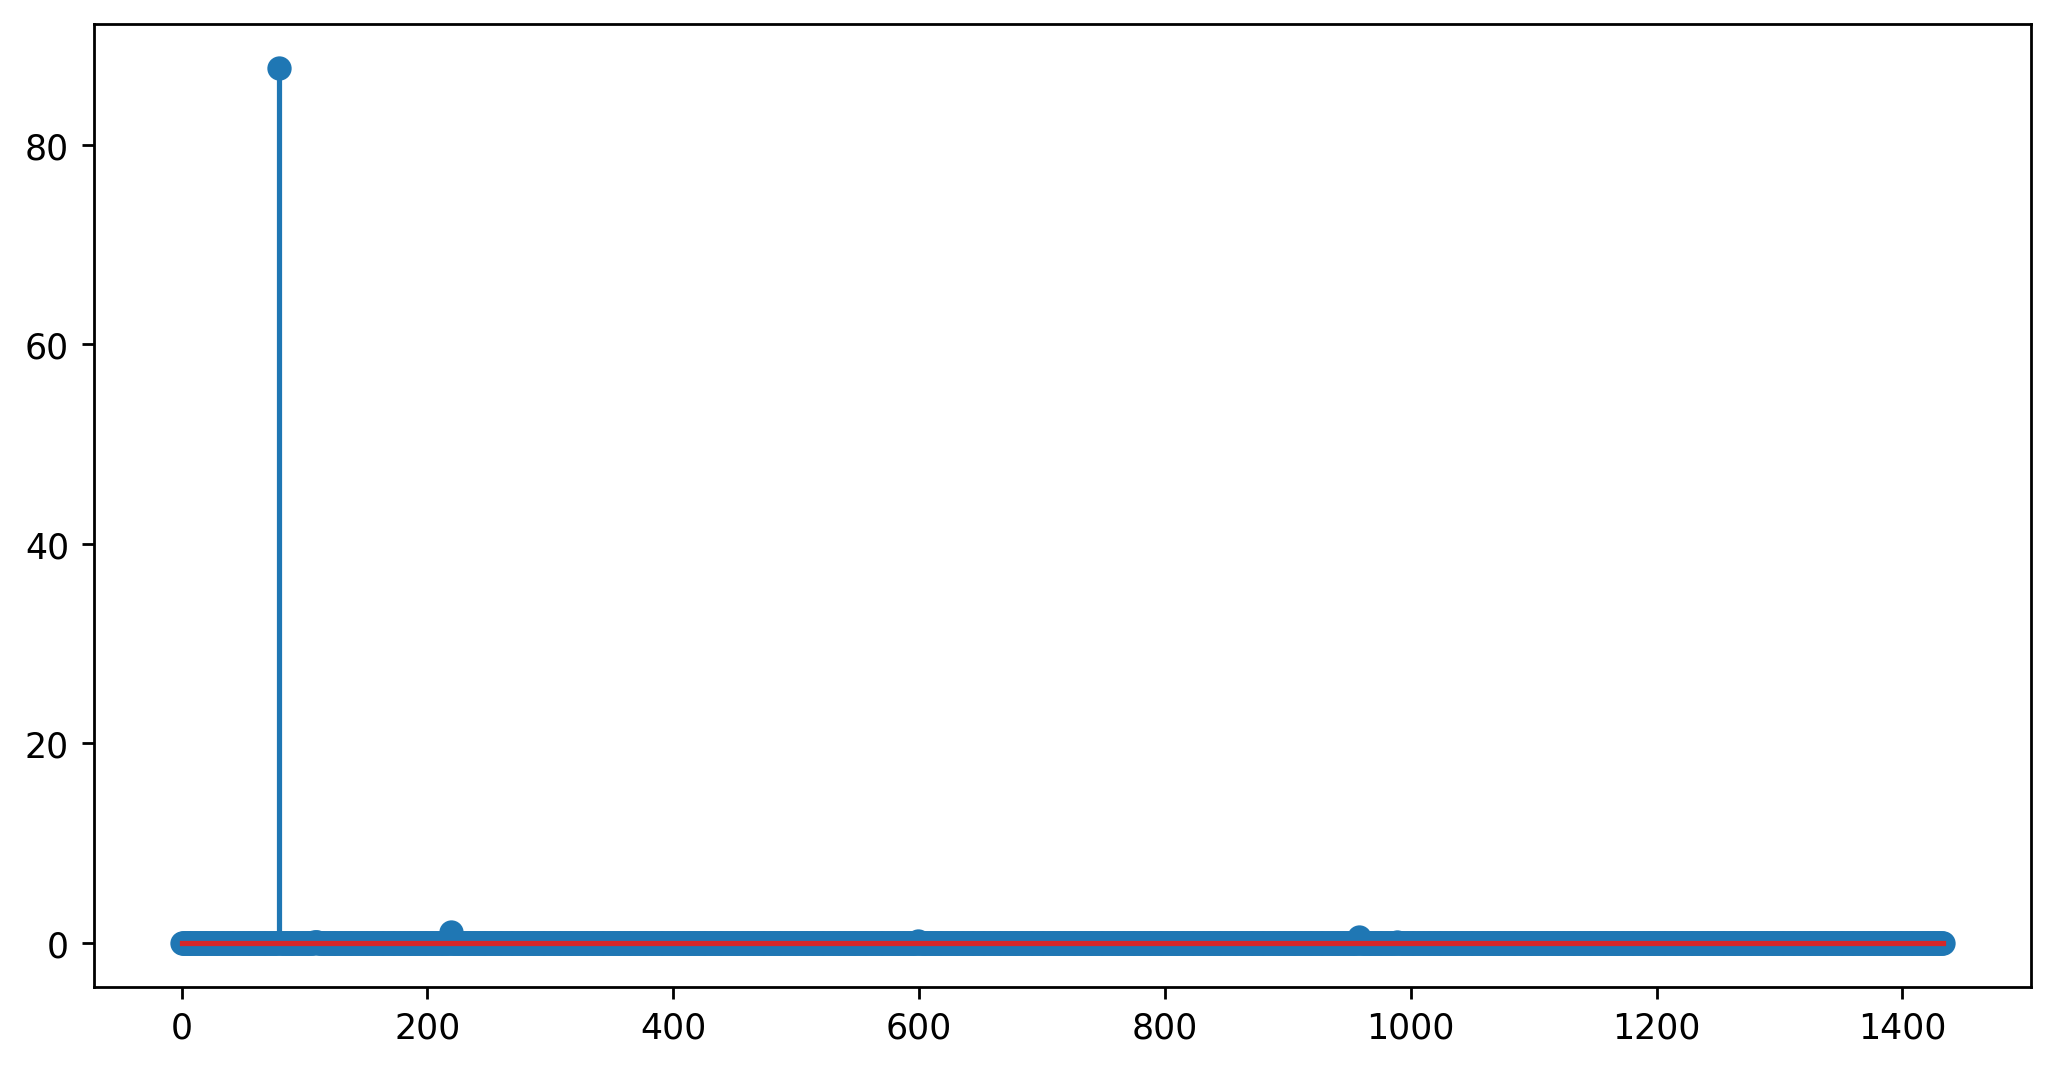

In [59]:
# create model again to check the cooks distance
model1=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=q2).fit()
inf=model1.get_influence()
c,p=inf.cooks_distance
plt.stem(range(len(q2)),c)
plt.show()

In [60]:
np.argmax(c),np.max(c)

(79, 87.69466003947721)

In [61]:
# again delete the record
q2.drop(index=[79],inplace=True)

In [62]:
# reseting the index
q2.reset_index(inplace=True)

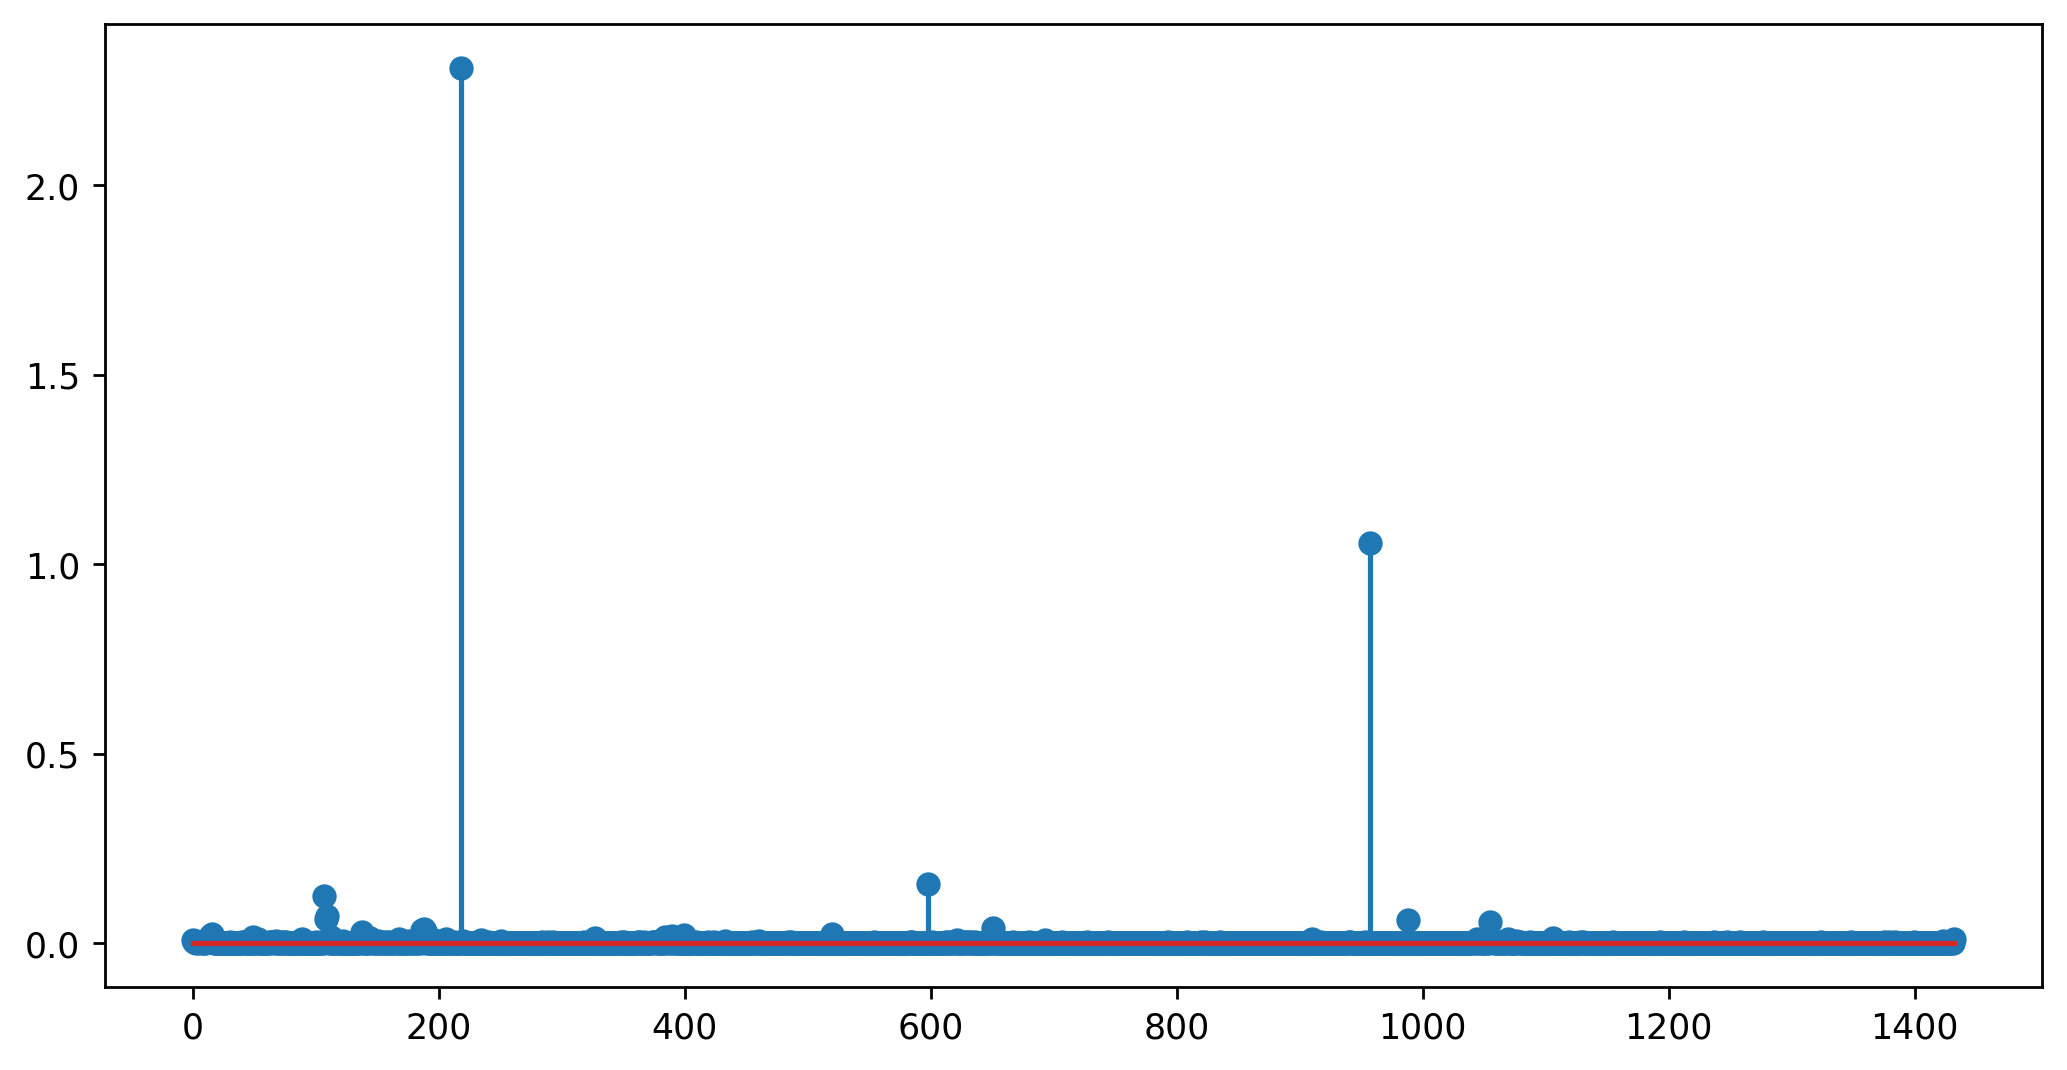

In [65]:
# create a model again to check the cooks distance
model1=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=q2).fit()
inf=model1.get_influence()
c,p=inf.cooks_distance
# Cooke's Distance plot
plt.stem(range(len(q2)),c)
plt.show()

In [66]:
np.argmax(c),np.max(c)

(218, 2.309608388227759)

In [67]:
q2.iloc[[218]]

,index,Price,Age,KM,HP,cc,Gears,Tax,Weight
218,219,12450,44,74172,110,1600,5,163,1615


In [68]:
# again delete the record
q2.drop(index=[218],inplace=True)

In [69]:
# reseting the index
q2.reset_index(inplace=True)

In [70]:
q2.drop(columns=['level_0'],inplace=True)

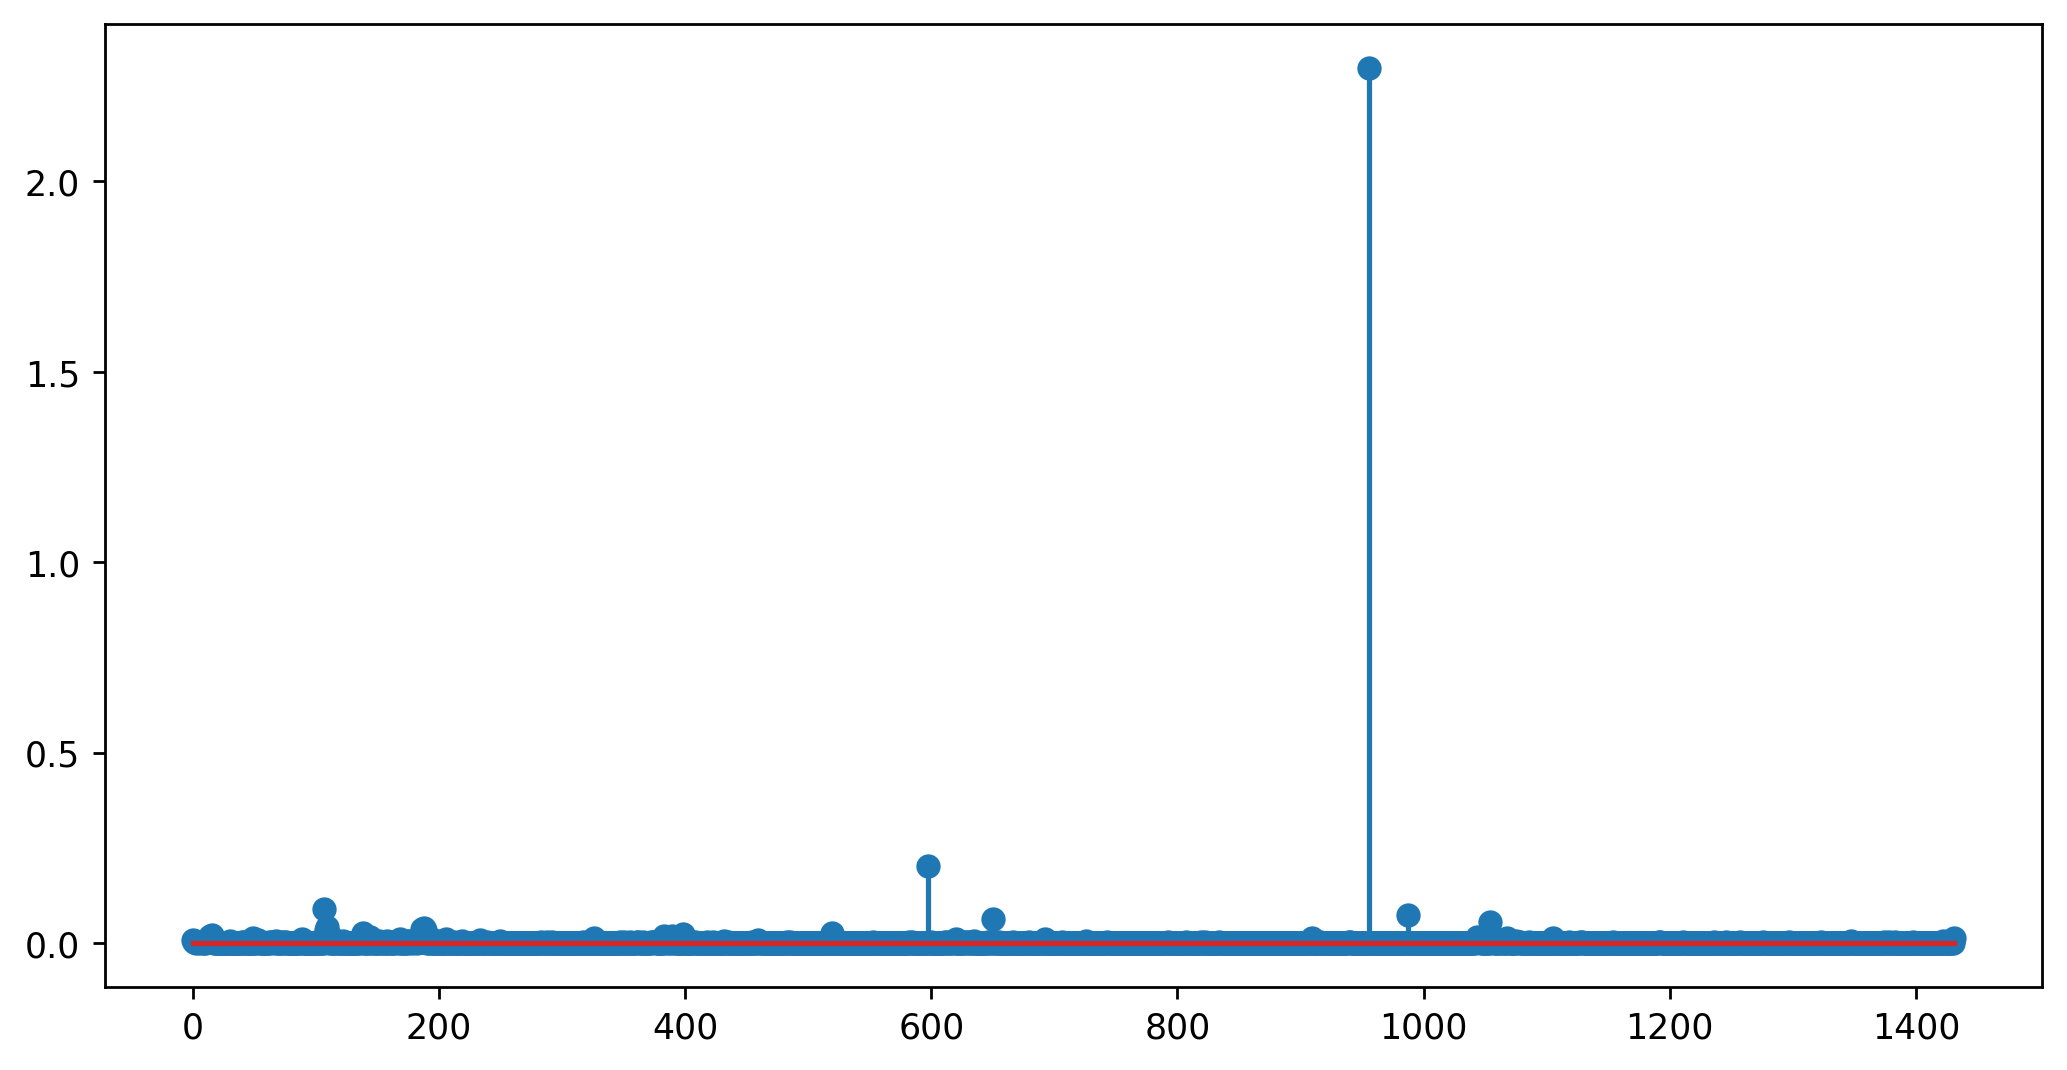

In [71]:
# create a model again to check the cooks distance
model1=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=q2).fit()
inf=model1.get_influence()
c,p=inf.cooks_distance
# Cooke's Distance plot
plt.stem(range(len(q2)),c)
plt.show()

In [72]:
np.argmax(c),np.max(c)

(956, 2.29777152589344)

In [73]:
q2.iloc[[956]]

,index,Price,Age,KM,HP,cc,Gears,Tax,Weight
956,958,9390,66,50806,86,1300,5,19,1480


In [74]:
# again delete the record
q2.drop(index=[956],inplace=True)

In [75]:
# reseting the index
q2.reset_index(inplace=True)

In [76]:
q2.drop(columns=['level_0'],inplace=True)

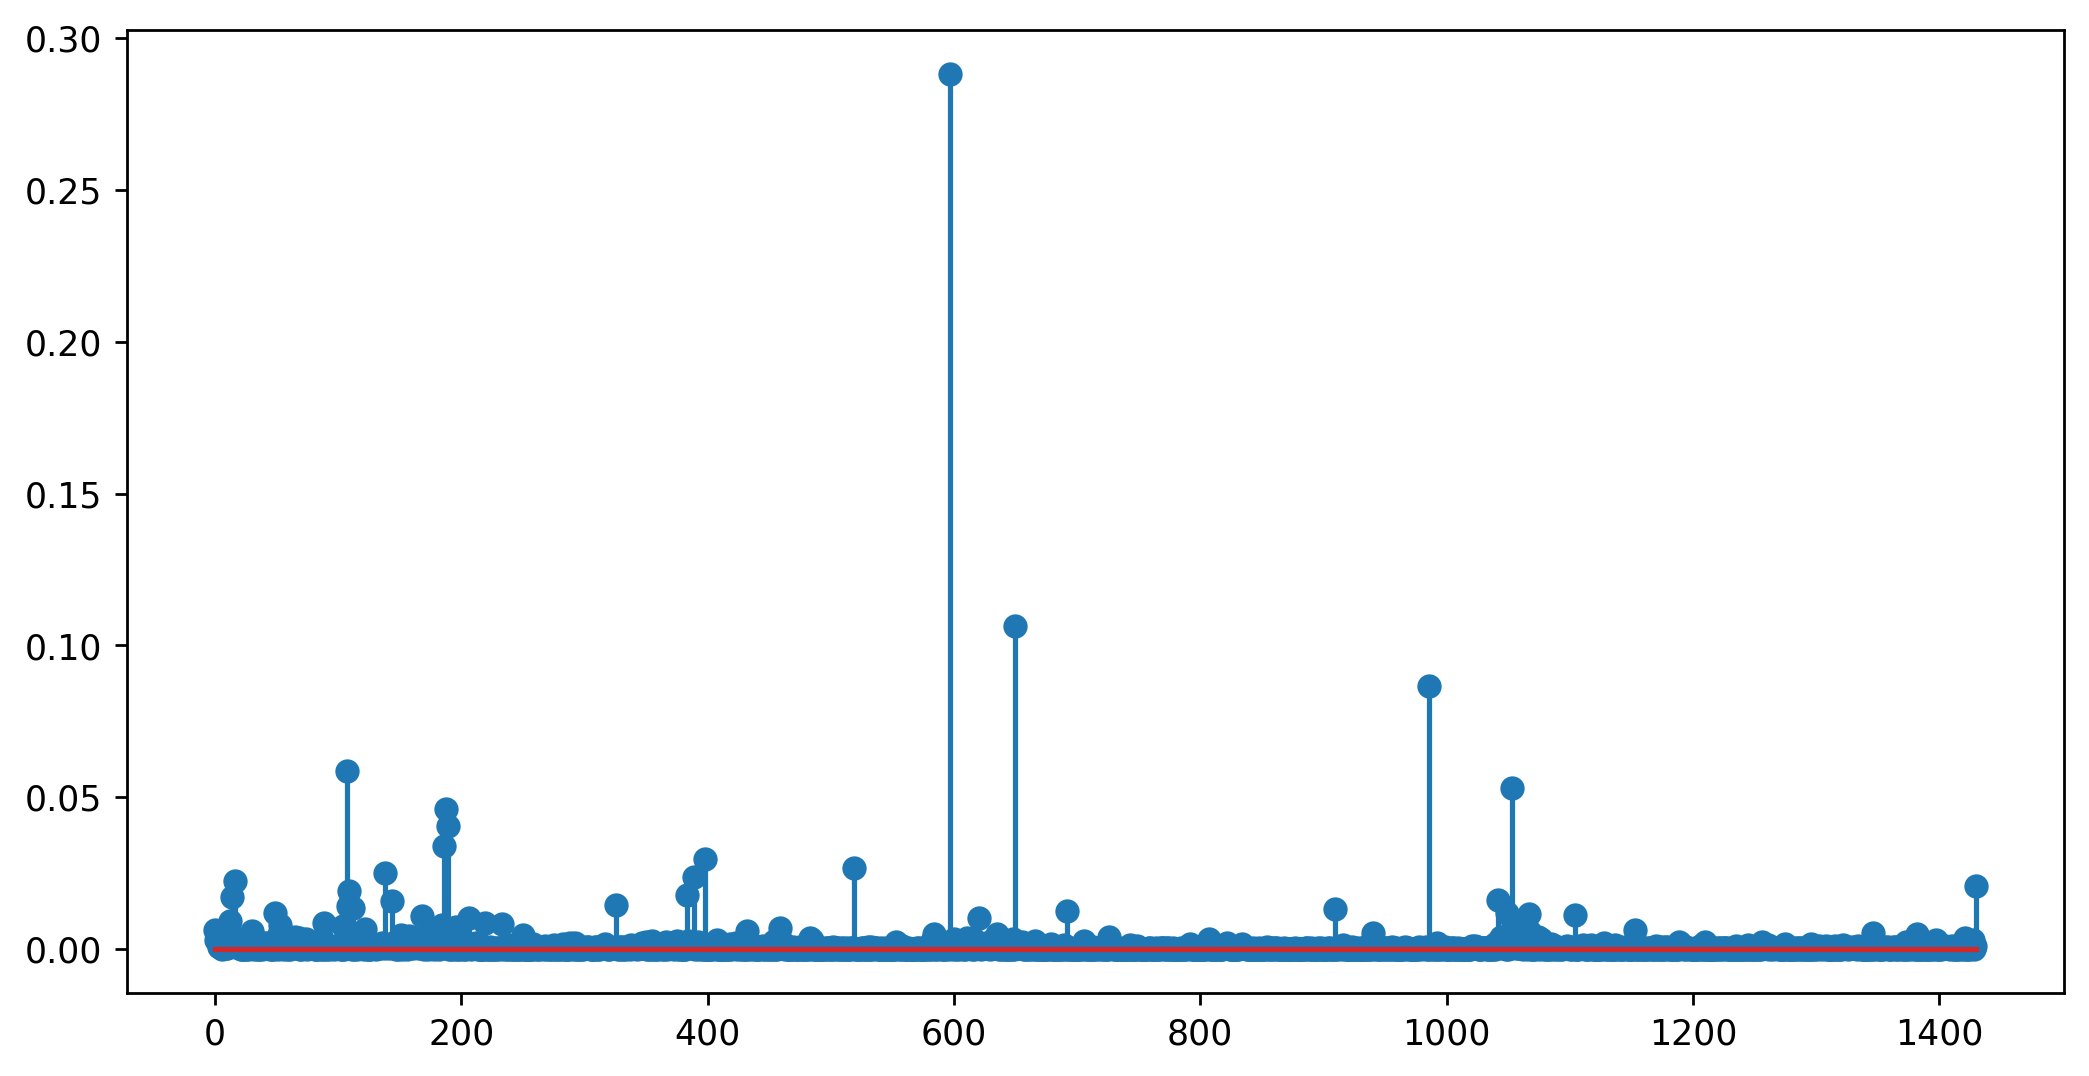

In [77]:
# create a model again to check the cooks distance
model1=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=q2).fit()
inf=model1.get_influence()
c,p=inf.cooks_distance
plt.stem(range(len(q2)),c)
plt.show()

In [78]:
# now there is no data point which is greater than 1 cooks distance

##### Creating a final model

In [79]:
final_model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=q2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1535.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:14:46   Log-Likelihood:                -12214.
No. Observations:                1431   AIC:                         2.444e+04
Df Residuals:                    1423   BIC:                         2.449e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.445e+04   1439.396    -10.040      0.000   -1.73e+04   -1.16e+04
Age         -112.4689      2.486    -45.235      0.000    -117.346    -107.592
KM            -0.0172      0.001    -14.305      0.000      -0.020      -0.015
HP            35.8564      2.749     13.043      0.000      30.464      41.249
cc            -3.6650      0.301    -12.167      0.000      -4.256      -3.074
Gears        580.6817    178.224      3.258      0.001     231.072     930.291
Tax            5.4878      1.374      3.994      0.000       2.792       8.183
Weight        29.2596      1.233     23.735      0.000      26.841      31.678
==============================================================================
Omnibus:                      109.714   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.428
Skew:                          -0.058   Prob(JB):                    2.24e-124
Kurtosis:                       6.088   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Predicting new data

In [80]:
newdf=pd.DataFrame({
    'Age':[24],
    'KM':[22000],
    'HP':[125],
    'cc':[1500],
    'Gears':[4],
    'Tax':[170],
    'Weight':[900]
})

In [81]:
final_model.predict(newdf)

0    11044.325276
dtype: float64